# Klasyfikacja przez podział przestrzeni cech

Przedstawione wcześniej metody klasyfikacji danych opierały się na ocenie podobieństwa nieznanej próbki do modeli klas, przy czym miarą podobieństwa była odpowiednio zdefiniowana odległość do klasy lub prawdopodobieństwo przynależności do modelu klasy. 

Geometryczna interpretacja zadania klasyfikacji - umieszczenie próbek i modeli klas w w wielowymiarowych przestrzeniach cech, pozwala na sformułowanie odmiennego pomysłu na jego realizację. Podstawą dla podejmowania decyzji o przynależności próbki do klasy może być podział przestrzeni cech na regiony, przypisane określonym klasom i sprawdzanie, do którego z nich należy badana próbka. Regiony te, nazywane są **<font color=blue> regionami decyzyjnymi </font>**(ang. <font color=red>decision regions</font>), a powierzchnie rozgraniczające te regiony nazywane są **<font color=blue> powierzchniami decyzyjnymi </font>** (ang. <font color=red>decision boundary</font>). Alternatywnie, podstawą decyzji może być określenie, po której stronie powierzchni decyzyjnej znajduje się badana próbka.

Celem uczenia algorytmów klasyfikacji, wykorzystujących jako podstawę podejmowania decyzji regiony lub powierzchnie decyzyjne, jest estymacja parametrów opisujących te regiony/powierzchnie, która musi być dokonana na podstawie wiedzy zawartej w przykładach.

## Liniowe funkcje dyskryminacji

Najprostszym rodzajem powierzchni decyzyjnej dzielącej przestrzeń cech jest hiperpłaszczyzna (płaszczyzna w przestrzeni 3D, prosta w 2D, próg w 1D). Jeżeli próbki należące do dwóch różnych klas, reprezentowane jako punkty w przestrzeni cech, można oddzielić od siebie za pomocą hiperpłaszczyzny, to istotą klasyfikacji byłoby stwierdzenie, po której stronie takiej hiperpłaszczyzny leży nieznana próbka. Aby to stwierdzić, wystarczy podstawić współrzędne próbki do równania hiperpłaszczyzny: tylko wtedy, gdy należy ona do hiperpłaszczyzny, wynik będzie zerem; w przeciwnym razie, wynik będzie albo dodatni (dla próbek położonych po jej 'dodatniej' stronie), albo ujemny (w przeciwnym razie). Rozważmy przypadek dwóch klas możliwych do rozdzielenia za pomocą linii prostej  (taki przypadek nazywa się **<font color=blue>problemem liniowo separowalnym</font>**).

-6.559093522944867
6.5982541623915605


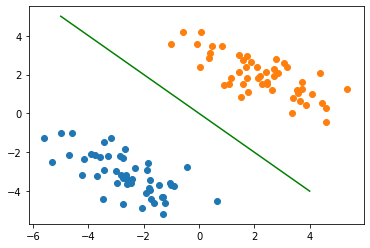

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n=50 # liczba próbek w klasie
mu1 = np.array([-3,-3])
mu2 = np.array([2,2])
C1 = np.array([[2,-1],[-1,1]])
C2 = np.array([[2,-1],[-1,1]])
# generacja próbek zgodnie z dwoma rozkładami Gaussa
X1 = np.random.multivariate_normal(mu1,C1,n) 
X2 = np.random.multivariate_normal(mu2,C2,n)
plt.scatter(X1[:,0], X1[:,1]) # w pythonie domyślnie próbki zapisuje się w wierszach macierzy :(
plt.scatter(X2[:,0], X2[:,1]) # więc X[:,0] to wsp. 'x-owe' wszystkich próbek
x = np.linspace(np.int(np.min(X1[:,0])), np.int(np.max(X2[:,1])),100)
plt.plot(x,-x, color='green') # rysowana jest linia o równaniu y = -x

# sprawdzenie wartości wyrażenia: y+x dla wybranej próbki pierwszej klasy i wybranej próbki drugiej klasy
print(X1[3,0]+X1[3,1])
print(X2[3,0]+X2[3,1])

Na potrzeby przedstawionego przykładu, próbki obydwu klas zostały wygenerowane w sposób pozwalający na przewidzenie postaci liniowej powierzchni separującej (czyli prostej  y = -x). W rzeczywistych zadaniach, równanie powierzchni separującej będzie określane na podstawie części treningowej zbioru posiadanych przykładów, a więc uczenie klasyfikatora liniowego będzie polegało na estymacji parametrów hiperpłaszczyzny rozgraniczającej próbki obydwu klas.

### Trening klasyfikatora - estymacja parametrów powierzchni decyzyjnej

Klasyfikacja metodą podziału przestrzeni cech na regiony decyzyjne wymaga przeprowadzenia rozbudowanej i starannej procedury treningu, której celem jest identyfikacja parametrów odpowiednich powierzchni decyzyjnych. Źrodłem wiedzy do realizacji tego zadania są, jak zwykle, próbki zbioru treningowego, a metodą jego realizacji jest zbudowanie funkcji kryterialnej, która w sposób ilościowy odzwierciedli oczekiwany cel jakościowy, czyli, zapewnienie poprawności rozpoznawania próbek. Tak sformułowane zadanie staje się niemal identyczne, jak zadanie regresji. Celem regresji było znalezienie parametrów $\boldsymbol{\theta}$ założonej funkcji, która zapewniała minimalizację błędu dopasowania do posiadanego rozkładu próbek treningowych $(x_i, y_i)$, gdzie jako błąd przyjęto średni kwadrat odstępstwa funkcji $f(x_i)$ modelującej rozkład, od rzeczywistych położeń próbek:

\begin{equation}
E(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^n (y_i - f(x_i,\boldsymbol{\theta}))^2 
\end{equation}

Jeżeli założymy, że przedmiotem klasyfikacji jest problem binarny (czyli mamy dwie klasy), to celem rozważanej metody klasyfikacji jest zapewnienie takiego doboru parametrów powierzchni decyzyjnej (funkcji), by próbki różnych klas leżały po przeciwnych stronach powierzchni. Ponieważ, jak wcześniej stwierdzono, powierzchnia decyzyjna ma 'dodatnią' i 'ujemną' stronę, warunek ten można próbować wyrazić w sposób analityczny: jeżeli szukana funkcja decyzyjna to $g(., \boldsymbol{\theta})$, to dla wszystkich próbek pierwszej klasy, chcielibyśmy, by $g(x_i^A,\boldsymbol{\theta})>0$, zaś dla wszystkich próbek drugiej klasy, by $g(x_j^B,\boldsymbol{\theta})<0$. Aby zbudować funkcję kryterialną analogiczną jak dla przypadku regresji (bo wtedy parametry powierzchni można określić analitycznie), konieczne jest dla oczekiwanej wartości wyniku analizy każdej próbki zastąpienie nierówności znakami równości (inaczej różnica między oczekiwaniem a wartością rzeczywistą jest nieokreślona). Przyjmijmy więc, że jeżeli próbka należy do pierwszej z klas (A) to  $g(x_i^A,\boldsymbol{\theta}) = a$ (np. a=1), a jeżeli należy do drugiej (B) to $g(x_i^B,\boldsymbol{\theta}) = b$ (np. b=-1). Przy takim założeniu (które oczywiście zniekształca rzeczywiste oczekiwania), funkcja kryterialna staje się formalnie identyczna z funkcją używaną w regresji, a więc możliwe staje się analityczne znalezienie parametrów powierzchni decyzyjnej $g(.)$ (miejsca zerowe pochodnych cząstkowych względem paramertów): 

\begin{equation}
J(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^n (y_i - g(x_i,\boldsymbol{\theta}))^2 
\end{equation}

gdzie etykiety próbek $y_i$ mają jedną z dwóch wartości (albo '-1', albo '1'). Klasyfikacja nieznanej próbki będzie polegała na wstawieniu jej do znalezionego równania powierzchni decyzyjnej, a następnie, na podjęciu odpowiedniej decyzji: jeżeli wynik będzie większy od progu 0, próbka zostanie zakwalifikowana do klasy A, jeżeli będzie mniejszy - do klasy B (próg jest ustalony tak, by zapewnić największą tolerancję na odstępstwa wartości wyniku od oczekiwanego zera lub jedynki).

Tak jak w każdej metodzie klasyfikacji, w klasyfikacji z wykorzystaniem powierzchni decyzyjnych, parametry klasyfikatora są wyznaczane na podstawie danych zawartych w zbiorze treningowym. Wartość wyrażenia określającego błąd dopasowania powierzchni decyzyjnej (czyil funkcji $g(.)$) do próbek, stanowi miarę ilościową jakości uzyskanego rozwiązania. Błąd ten nazywa się **<font color=blue>błędem empirycznym</font>** lub **<font color=blue>ryzykiem empirycznym</font>** (ang. <font color=red>empirical risk</font>), a jego wartość stanowi element oceny jakości uzyskanego algortymu klasyfikacji. 

#### Przykład

Wyznaczmy parametry liniowej powierzchni separującej dla próbek z poprzedniego przykładu. W tym celu skorzystamy z gotowych narzędzi dla estymacji wartości współczynników regresji liniowej, przy czym, należy pamiętać o interpretacji wykonywanej operacji: dla każdej próbki wynikiem funkcji $g(.)$ jest etykieta próbki (a nie wartość funkcji $f(.)$, jak miało to miejsce poprzednio).

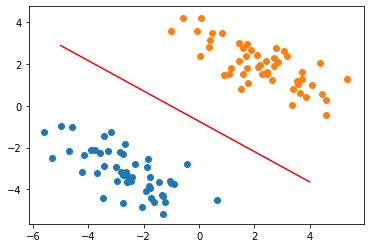

In [2]:
from sklearn import linear_model

# próbki
plt.scatter(X1[:,0], X1[:,1]) # w pythonie domyślnie próbki zapisuje się w wierszach macierzy :(
plt.scatter(X2[:,0], X2[:,1]) # więc X[:,0] to wsp. 'x-owe' wszystkich próbek
# utworzenie zmiennych dla procedury regresji - Y - etykiety klas, X1 ma etykietę '1', X2 - '0'
X = np.concatenate((X1,X2),axis=0)
Y = np.ones(np.shape(X)[0])
Y[:np.shape(X1)[0]] = -1
# określenie współczynników regresji liniowej
Reg = linear_model.LinearRegression()
Reg.fit(X, Y) # model to g = Ax0 + Bx1 + C
# wizualizacja wyniku
x = np.linspace(np.int(np.min(X[:,0])), np.int(np.max(X[:,1])),100)
y = -(x*Reg.coef_[0] + Reg.intercept_ )/Reg.coef_[1] # linia o równaniu y = -(Ax +C) / B
plt.plot(x,y, color='red') 

In [3]:
X[:,0]

array([-4.68551813, -2.3318908 , -4.61045546, -2.96242685, -4.98688654,
       -2.63809931, -1.23454002, -2.66228126, -1.29829752, -1.78244539,
       -2.74739857, -3.76245082, -0.43828762, -2.41086628, -1.33996019,
       -4.17260277, -1.74229318, -2.86737897, -1.79138542, -2.04782271,
       -2.75162486, -1.43298733, -1.85084292, -3.2007174 , -1.76081977,
       -2.75977375, -3.4617466 , -3.59161461, -3.42309004, -1.62471914,
       -5.59061825, -3.44358327, -3.01425774, -0.99588348, -2.68876214,
       -2.60412017, -1.0550538 , -3.92365945,  0.64682563, -0.90394564,
       -2.83132838, -3.28293297, -1.31078085, -1.88673236, -2.61577766,
       -1.91452261, -5.3229411 , -4.21367449, -3.68808577, -2.46737428,
        4.59271349,  4.46409771,  2.28163199,  5.34369258,  2.77900788,
        1.60342094,  1.88851539, -1.01170178,  0.40469175,  2.62759033,
        2.14736891,  2.44519128,  0.90751983,  2.45449418,  3.41303348,
        2.87071542,  0.84489063,  1.58612107,  1.74243483,  3.35

In [4]:
X[:,1]

array([-2.15585742, -2.78537212, -1.02249353, -3.59666668, -0.99437889,
       -3.17298963, -4.59936673, -1.81208766, -4.29283434, -3.93362969,
       -4.64299055, -2.12856159, -2.77503452, -3.39419617, -4.28806321,
       -2.33917795, -4.39599847, -2.20754723, -3.81527732, -4.85223378,
       -2.29369803, -3.67124358, -2.54340775, -1.25323215, -3.40255477,
       -3.32525213, -4.39364449, -2.23988698, -1.45232574, -4.61290445,
       -1.27040764, -2.90291544, -2.94991065, -3.69717568, -3.29297613,
       -3.35151185, -3.58082973, -2.10400269, -4.50995643, -3.74287641,
       -3.1901992 , -2.1828198 , -5.15901012, -2.93056482, -3.63891878,
       -4.10011272, -2.47704094, -3.14726771, -3.19719774, -3.60157285,
       -0.43976372,  0.54922449,  1.52868357,  1.25456158,  2.77669837,
        2.74840536,  2.65780344,  3.57669504,  3.11979649,  1.22084093,
        1.84600875,  1.49268489,  1.48633206,  1.60217081,  0.78896322,
        2.0683813 ,  3.47341178,  1.49868922,  2.96818958,  0.03

Najistotniejszą cechą zaprezentowanej koncepcji klasyfikacji danych jest to, że decyzja o przynależności próbki do klasy jest podejmowana w wyniku okerślenia wartości **iloczynu skalarnego** wektora, reprezentującego tą próbkę i wektora współczynników funkcji liniowej, stanowiącej przyjęty model problemu:

\begin{equation}
y = \boldsymbol{\theta}^T \mathbf{x} = 
\left\{ 
\begin{array}{ccc}
A & gdy & y>\alpha \\
B & gdy & y<\alpha
\end{array}
\right.
\end{equation}

Reprezentowana przez wektor $\boldsymbol{\theta}$ funkcja liniowa, uzyskana w wyniku treningu klasyfikatora, nazywa się **<font color=blue>liniową funkcją dyskryminacji</font>**.

Klasyfikacja z wykorzystaniem liniowych funkcji dyskryminacji ma fundamentalne ograniczenia. Pierwszym źródłem ograniczającym jej przydatność jest trudność uzyskania poprawnej powierzchni separującej klasy, nawet w przypadku, gdy klasy można oddzielić od siebie za pomocą hiperpłaszczyzny (są liniowo separowalne). Przyjęty sposób oceny błędu klasyfikacji, wykorzystywany podczas treningu, to niejawne założoenie, że próbki danej klasy są jednakowo odległe od poszukiwanej powierzchni (tylko wtedy można uzyskać dla równania liniowego błąd zerowy). Gdy sytuacja taka nie zachodzi, lub gdy w zbiorze danych pojawiają się tzw. obserwacje odstające, uzyskanie właściwej hiperpłaszczyzny separującej może nie być wykonalne (proszę wyznaczyć równanie prostej, zakładając że np. w pierwszym zbiorze zamieniam pierwszą współrzędne pierwszej próbki na wartości (-100,-100)). 

## Regresja logistyczna

Pomysłem na eliminację problemu pojawiania się podczas treningu błędów dla próbek położonych po 'właściwej' stronie hiperpłaszczyzny separującej, ale odległych od niej, jest przyjęcie, że $g(.)$ jest odpowiednią funkcją nieliniową. 'Odpowiedniość' to zapewnienie by w miarę przesuwania się próbki wgłąb obszaru przypisanego danej klasie, wartość funkcji coraz silniej wskazywała na przynależność próbki do tej klasy (a więc błąd estymacji etykiety malał). Funkcją, zapewniającą taką właściwość jest tzw. **<font color=blue>funkcja logistyczna</font>**: zakładając, że argument funkcji (zmienna $s$) to wynik iloczynu skalarnego wektorów $\boldsymbol{\theta}$ i **x** (próbka), funkcja ta będzie miała wartości dążące do jedności w miarę przesuwania się wgłąb półprzestrzeni położonej po jednej stronie hiperpłaszczyzny separującej, zaś dążące do zera, w miarę przesuwania się wgłąb drugiej podprzestrzeni:

\begin{equation}
y = g(s) = g (\boldsymbol{\theta}^T \mathbf{x}) = \frac{1}{1 + e^{-\beta s}}
\end{equation}

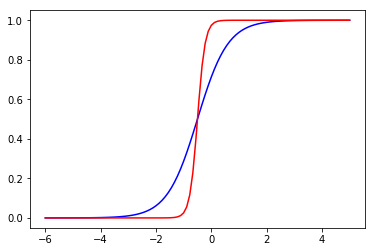

In [10]:
s = np.linspace(-10,10,100)
plt.plot(x,1/(1+np.exp(-s)), color='blue')  # beta = 1 
plt.plot(x,1/(1+np.exp(-4*s)), color='red') # beta = 4

Przyjęcie jako podstawy do podejmowania decyzji funkcji logistycznej skutkuje zwiększaniem pewności, że próbka należy do klasy A lub B w miarę, gdy jest ona położona dalej od powierzchni separującej. Niestety, wprowadzenie funkcji nieliniowej sprawia, że analityczne wyznaczenie wektora parametrów powierzchni separującej staje się niemożliwe i musi być on wyznaczany z wykorzystaniem metod optymalizacyjnych.

#### Przykład

Przedstawione poniżej porównanie klasyfikacji danych z wykorzystaniem liniowej powierzchni decyzyjnej za pomocą liniowej funkcji dyskryminacji i funkcji wykorzystującej regresję logistyczną, w odniesieniu do problemu binarnej klasyfikacji, pokazuje przewagę drugiego podejścia.

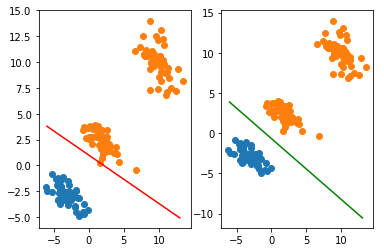

In [18]:
# klasa A pozostaje bez zmian, klasa B ma tym razem dwa mody 
C3 = np.array([[2,-1],[-1,2]])
mu3 = np.array([10,10])
# generacja próbek zgodnie z dwoma rozkładami Gaussa
n=50
X2 = np.random.multivariate_normal(mu2,C2,n)
X3 = np.random.multivariate_normal(mu3,C3,n)
X23 = np.concatenate((X2,X3),axis=0)

X = np.concatenate((X1,X23),axis=0)
Y = np.zeros(np.shape(X)[0])
Y[:np.shape(X1)[0]] = 1
# określenie współczynników regresji liniowej za pmocą liniowej funkcji dyskryminacji
RegLin = linear_model.LinearRegression()
RegLin.fit(X, Y) # model to g = Ax0 + Bx1 + C
# wizualizacja wyniku
x = np.linspace(np.int(np.min(X[:,0])), np.int(np.max(X[:,1])),100)
y = -(x*RegLin.coef_[0] + RegLin.intercept_ -0.5)/RegLin.coef_[1] # linia o równaniu y = -(Ax +C =0.5) / B
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.scatter(X1[:,0], X1[:,1]) 
plt.scatter(X23[:,0], X23[:,1]) 
plt.plot(x,y, color='red') 

# klasyfikacja z wykorzystaniem regresji logistycznej
RegLog = linear_model.LogisticRegression()
RegLog.fit(X, Y) # model to funkcja logistyczna
y = -(x*RegLog.coef_[0,0] + RegLog.intercept_ -0.5)/RegLog.coef_[0,1] 
fig.add_subplot(1,2,2)
plt.scatter(X1[:,0], X1[:,1]) 
plt.scatter(X23[:,0], X23[:,1]) 
plt.plot(x,y, color='green') 


### Probabilistyczna perspektywa regresji logistycznej

Rozwiązanie problemu regresji logistycznej, czyli wyznaczenie na podstawie danych treningowych parametrów hiperpłaszczyzny zapewniającej separację próbek dwóch klas, jest przeprowadzenie iteracyjnej procedury minimalizacji funkcji błędu, określonego jako średni kwadrat różnicy między założonym a uzyskanym wynikiem klasyfikacji próbki (wartością funkcji logistycznej dla tej próbki).

Innym pomysłem na ocenę błędu, który okaże się być niezwykle przydatny dla innych koncepcji rozpoznawania (w szczególności, dla głębokich sieci neuronowych), jest potraktowanie zadania klasyfikacji binarnej (takiej, w której mamy tylko dwie klasy) w kategoriach probabilistycznych. Wynik eksperymentu klasyfikacji pojedynczej próbki $\mathbf{x}_i$ może być utożsamiony ze zmienną losową, która dla różnych próbek $i$ ma przyjmować dwie wartości: '0' lub '1'. Dla aktualnego wektora parametrów $\boldsymbol{\theta}$ i danej próbki $\mathbf{x}_i$, wartość funkcji logistycznej (a więc wynik estymacji oczekiwanej wartości etykiety) to $p_i = g(\boldsymbol{\theta}^T \mathbf{x}_i)$, w przypadku gdy wynikiem ma być $y_i=1$, zaś $q_i = 1-p_i = 1-g(\boldsymbol{\theta}^T \mathbf{x}_i)$, gdy wynikiem ma być $y_i=0$. Prawdopodobieństwo poprawnej klasyfikacji pojedynczej próbki $\mathbf{x}_i$ można zapisać w zwięzłej postaci:

\begin{equation}
p(\mathbf{x}_i) = p_i^{y_i}(1-p_i)^{1-y_i}
\end{equation}

ponieważ jeżeli oczekiwaną wartością wyniku klasyfikacji jest $y_i=1$, to $p(\mathbf{x}_i) = p^{1}(1-p)^0 = p$, zaś gdy oczekiwaną wartością jest $y_i=0$, to $p(\mathbf{x}_i) = p^{0}(1-p)^1 = 1-p$. Jeżeli klasyfikacji poddawanych jest n-próbek ze zbioru treningowego, a kolejne próbki są od siebie niezależne, to wypadkowe p-stwo uzyskania sekwencji samych poprawnych wyników jest iloczynem p-stw indywidualnych, czyli:

\begin{equation}
p(\mathbf{x}_1 ... \mathbf{x}_n / \boldsymbol{\theta}) = \prod_{i=1}^n p_i^{y_i}(1-p_i)^{(1-y_i)}
\end{equation}

Powyższe wyrażenie stanowi kryterium doboru wartości parametrów $\boldsymbol{\theta}$, które należy dobrać w sposób zapewniający maksymalizację przedstawionego prawdopodobieństwa ( w terminologii anglojęzycznej to <font color=red> likelihood maximization</font>). Ponieważ mnożenie p-stw dla większych zbiorów próbek treningowych prowadzi do błędów numerycznych, w praktyce zamiast prawdopodobieństwa stosuje się logarytm powyższego wyrażenia (lokalizacja maksimum nie ulega zmianie), czyli przedmiotem procedury jest poszukiwanie wektora parametrów, zapewniającego maksymalizację następującej funkcji kryterialnej:

\begin{equation}
\mathcal{l} (\boldsymbol{\theta}) = log\left(p(\mathbf{x}_1 ... \mathbf{x}_n / \boldsymbol{\theta})\right) = log\left(\prod_{i=1}^n p^{y_i}(1-p)^{(1-y_i)}\right) = \sum_{i=1}^n log\left(p_i^{y_i}(1-p_i)^{(1-y_i)}\right) = \sum_{i=1}^n \left( y_i log(p_i) +(1-y_i)log(1-p_i) \right)
\end{equation}

gdzie $p(\mathbf{x_i}) = g(s_i) = g(\mathbf{\theta}^T \mathbf{x}_i)$ jest opisane funkcją logistyczną. W przeciwieństwie do opisanego wcześniej zadania regresji liniowej, nie ma możliwości analitycznego wyznaczenia poszukiwanego wektora parametrów (funkcja jest nieliniowa ze względu na $\boldsymbol{\theta}$. Dlatego też, dla rozwiązania problemu konieczne jest zastosowanie procedury optymalizacyjnej - iteracyjnych korekt elementów wektora parametrów, prowadzących do maksymalizacji wartości funkcji kryterialnej

Jeżeli możliwe jest określenie wartości gradientu funkcji kryterialnej, podstawową metodą optymalizacji stają się techniki gradientowe, a więc metod najszybszego spadku (gradient descent), gdy celem jest minimalizacja funkcji celu, lub metoda najszybszego wzrostu (gradient ascent), gdy celem jest jej maksymalizacja. Kluczową koncepcją technik gradientowych jest uaktualnianie wektora parametrów o przyrosty proporcjonalne do gradientu (taka korekta zapewnia, pod pewnymi warunkami, uzyskanie maksymalnej poprawy funkcji celu):

\begin{equation}
\boldsymbol{\theta}^{t+1} = \boldsymbol{\theta}^t \pm \eta \nabla l(\boldsymbol{\theta}) \rightarrow \forall_{j \in [1 ... d]} \hspace{0.3cm} \theta_j^{t+1} = \theta_j^t \pm \eta \frac{\partial l(\boldsymbol{\theta}, \mathbf{x}_i)}{\partial \theta_j}
\end{equation}

gdzie $t$ to indeks iteracji, $\eta$ to pewna stała dodatnia, kontrolująca zakres modyfikacji, $\nabla$ oznacza gradient, a znak zależy od wyboru metody ('plus' dla maksymalizacji, 'minus' - dla minimalizacji funkcji celu). Ponieważ funkcja celu jest sumą wyrażeń związanych z prezentacjami kolejnych próbek, korekty mogą być dokonywane dla każdej z próbek osobno. Komponent funkcji celu dla próbki $\mathbf{x}_i$ to:
\begin{equation}
l_i (\boldsymbol{\theta}) = y_i\log g(\boldsymbol{\theta}^T, \mathbf{x}_i) + (1-y_i) \log (1 - g(\boldsymbol{\theta}^T, \mathbf{x}_i)) = y_i\log g + (1-y_i)\log( 1 - g) 
\end{equation}
więc jego pochodna względem $\theta_j$ to wyrażenie:

\begin{equation}
\frac{\partial l_i(.)}{\partial \theta_j} =  \frac{\partial (y_i\log g + (1-y_i)\log( 1 - g) )}{\partial \theta_j} = \left( \frac{y_i}{g} - \frac{1-y_i}{1-g} \right) \frac{\partial g}{\partial \theta_j} = \left( \frac{y_i}{g} - \frac{1-y_i}{1-g} \right) g (1-g) x_j = [ y_i(1-g) - (1-y_i)g ] x_j = (y_i - y_i g - g +y_i g) x_j = (y_i - g) x_j
\end{equation}

Pochodna komponentu ma więc bardzo prostą i łatwą do obliczenia postać ($(y_i - g) x_j$) o przejrzystej interpretacji: jest to różnica między oczekiwaną a wygenerowaną wartością etykiety, pomnożona przez wartość elementu próbki, odpowiadającego modyfikowanemu elementowi wektora parametrów. W efekcie, w każdej iteracji następuje korekta wartości wektora parametrów postaci:

\begin{equation}
\boldsymbol{\theta}^{t+1} = \boldsymbol{\theta}^t \pm \eta \left( y_i - g(\boldsymbol{\theta}^T \mathbf{x}_i) \right) \mathbf{x}_i
\end{equation}